# 感知机的实现

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size=256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 初始化模型参数
输入为像素28*28，输出为十个类别，设定其中包含256个隐藏单元

In [3]:
num_inputs, num_output, num_hidens_1, num_hidden_2 = 784, 10, 256, 64

W1 = nn.Parameter(torch.randn((num_inputs, num_hidens_1), requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hidens_1), requires_grad=True)

W2 = nn.Parameter(torch.randn((num_hidens_1, num_hidden_2), requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_hidden_2, requires_grad=True))

W3 = nn.Parameter(torch.randn((num_hidden_2, num_output), requires_grad=True)*0.01)
b3 = nn.Parameter(torch.zeros(num_output, requires_grad=True))

params = [W1, b1, W2, b2, W3, b3]

## 定义激活函数

In [4]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

## 定义模型

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H_1 = relu(X @ W1 + b1)
    H_2 = relu(H_1 @ W2 + b2)
    return (H_2 @ W3 + b3)

## 定义损失函数

In [6]:
loss = nn.CrossEntropyLoss(reduction='none')

## 训练

In [7]:
num_epochs, lr = 50, 0.1
trainer = torch.optim.SGD(params, lr=lr)
# d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 应用封装的简洁模型定义
应用封装应在trainer中通过`net.parameters()`返回参数值以更新参数

In [8]:
net_concise = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net_concise.apply(init_weights)

trainer = torch.optim.SGD(net_concise.parameters(), lr=lr)

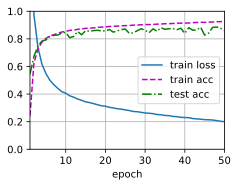

In [9]:
d2l.train_ch3(net_concise, train_iter, test_iter, loss, num_epochs, trainer)

## 加入DropOut

In [10]:
drop_out_1, drop_out_2 = 0.2, 0.5
net_drop = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(drop_out_1),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Dropout(drop_out_2),
    nn.Linear(64, 10)
)
net_drop.apply(init_weights)
loss_drop = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net_drop.parameters(), lr=lr)

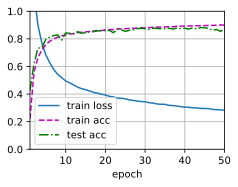

In [11]:
d2l.train_ch3(net_drop, train_iter, test_iter, loss, num_epochs, trainer)